In [13]:
# imports 
from pyforest import *

In [14]:
# read dataset
df_covid = pd.read_csv('dataset/imputed-data.csv',header = 0)
df_covid.head()

<IPython.core.display.Javascript object>

,date,county_fips,county_name,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_visitation_grade,social_distancing_encounters_grade,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio,death_ratio,population_ratio_in_state
0,2020/01/22,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
1,2020/01/23,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
2,2020/01/24,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
3,2020/01/25,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
4,2020/01/26,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047


In [15]:
# df_informations
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992266 entries, 0 to 992265
Data columns (total 64 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   date                                           992266 non-null  object 
 1   county_fips                                    992266 non-null  int64  
 2   county_name                                    992266 non-null  object 
 3   state_fips                                     992266 non-null  int64  
 4   state_name                                     992266 non-null  object 
 5   covid_19_confirmed_cases                       992266 non-null  float64
 6   covid_19_deaths                                992266 non-null  float64
 7   social_distancing_total_grade                  992266 non-null  object 
 8   social_distancing_visitation_grade             992266 non-null  object 
 9   social_distancing_encounters_grade   

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='total_population', ylabel='population_density'>

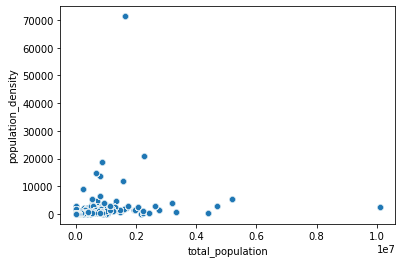

In [16]:
# total_population vs population density
sns.scatterplot(x = 'total_population',y = 'population_density',data = df_covid)

In [17]:
# droping county and state name
df_covid.drop(['county_name','state_name'],inplace = True, axis = 1)

In [18]:
# keeping columns name 
col_list = df_covid.columns
col_list

Index(['date', 'county_fips', 'state_fips', 'covid_19_confirmed_cases',
       'covid_19_deaths', 'social_distancing_total_grade',
       'social_distancing_visitation_grade',
       'social_distancing_encounters_grade',
       'social_distancing_travel_distance_grade',
       'retail_and_recreation_mobility_percent_change',
       'grocery_and_pharmacy_mobility_percent_change',
       'workplaces_mobility_percent_change', 'daily_state_test',
       'precipitation', 'temperature', 'percent_of_vaccinated_residents',
       'virus_pressure', 'total_population', 'proportion_female', 'area',
       'population_density', 'latitude', 'longitude', 'hospital_beds_ratio',
       'ventilator_capacity_ratio', 'intensive_care_unit_(ICU)_bed_ratio',
       'housing_density', 'less_than_high_school_diploma',
       'high_school_diploma_only', 'some_college_or_higher',
       'academic_population_ratio', 'percent_of_smokers',
       'percent_of_diabetes', 'religious_congregation_ratio',
       'polit

In [19]:
# date as date format
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid['date']

<IPython.core.display.Javascript object>

0        2020-01-22
1        2020-01-23
2        2020-01-24
3        2020-01-25
4        2020-01-26
            ...    
992261   2021-06-06
992262   2021-06-07
992263   2021-06-08
992264   2021-06-09
992265   2021-06-10
Name: date, Length: 992266, dtype: datetime64[ns]

In [20]:
df_covid['date'].max()

Timestamp('2021-06-10 00:00:00')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='date'>

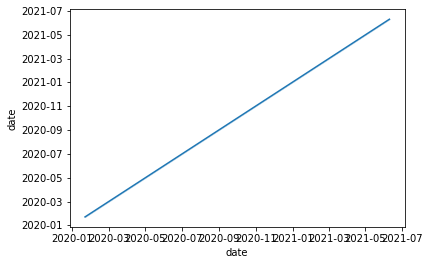

In [21]:
# checking pattern of date
sns.lineplot(x = 'date',y = 'date',data = df_covid)

In [22]:
# country fipes unique len
len(df_covid.county_fips.unique())

1961

In [23]:
# state fipes unique
len(df_covid.state_fips.value_counts())

49

In [24]:
df_covid.state_fips.value_counts()

48    76406
37    45034
13    37444
29    36432
47    35420
39    34914
26    34408
55    32384
19    31878
17    31372
18    30866
51    30866
5     28336
27    28336
12    27830
42    27830
36    27324
6     27324
21    26818
1     25300
40    23276
20    22264
28    20746
8     20746
45    20240
22    19228
53    15180
41    15180
54    14674
35    13156
16    12650
31    11638
49    10626
30     9108
34     9108
24     8602
56     8602
23     8096
46     7590
4      7590
25     7084
38     5566
50     5566
33     5060
32     5060
9      3542
44     2024
15     2024
10     1518
Name: state_fips, dtype: int64

In [25]:
# top populated counties
cov_top_pop = df_covid.groupby(['county_fips'])['total_population'].sum().sort_values(ascending = False)
top_pop = list(cov_top_pop.index[:5])
top_pop

[6037, 17031, 48201, 4013, 6073]

In [26]:
# groupby for top population
covid_grp = df_covid[df_covid['county_fips'].isin(top_pop)].groupby(['date',
                                                                     'county_fips'])[col_list[3:]].sum().reset_index()
covid_grp.head()

,date,county_fips,covid_19_confirmed_cases,covid_19_deaths,retail_and_recreation_mobility_percent_change,grocery_and_pharmacy_mobility_percent_change,workplaces_mobility_percent_change,daily_state_test,precipitation,temperature,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio,death_ratio,population_ratio_in_state
0,2020-01-22,4013,0.0,0.0,0.0,0.0,0.0,0.0,15.0,11.40,...,5,5,4,3,2,2,2,0.019738,0.007314,61.503649
1,2020-01-22,6037,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.32,...,6,5,3,2,2,2,2,0.022478,0.006360,25.546696
2,2020-01-22,6073,0.0,0.0,0.0,0.0,0.0,1.0,0.6,10.36,...,6,5,3,2,2,2,2,0.024757,0.006515,8.452006
3,2020-01-22,17031,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-9.46,...,6,5,4,3,2,2,2,0.016352,0.007940,40.659764
4,2020-01-22,48201,0.0,0.0,0.0,0.0,0.0,1.0,15.2,7.50,...,6,4,3,2,1,1,1,0.012861,0.005782,16.370442


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x1440 with 0 Axes>

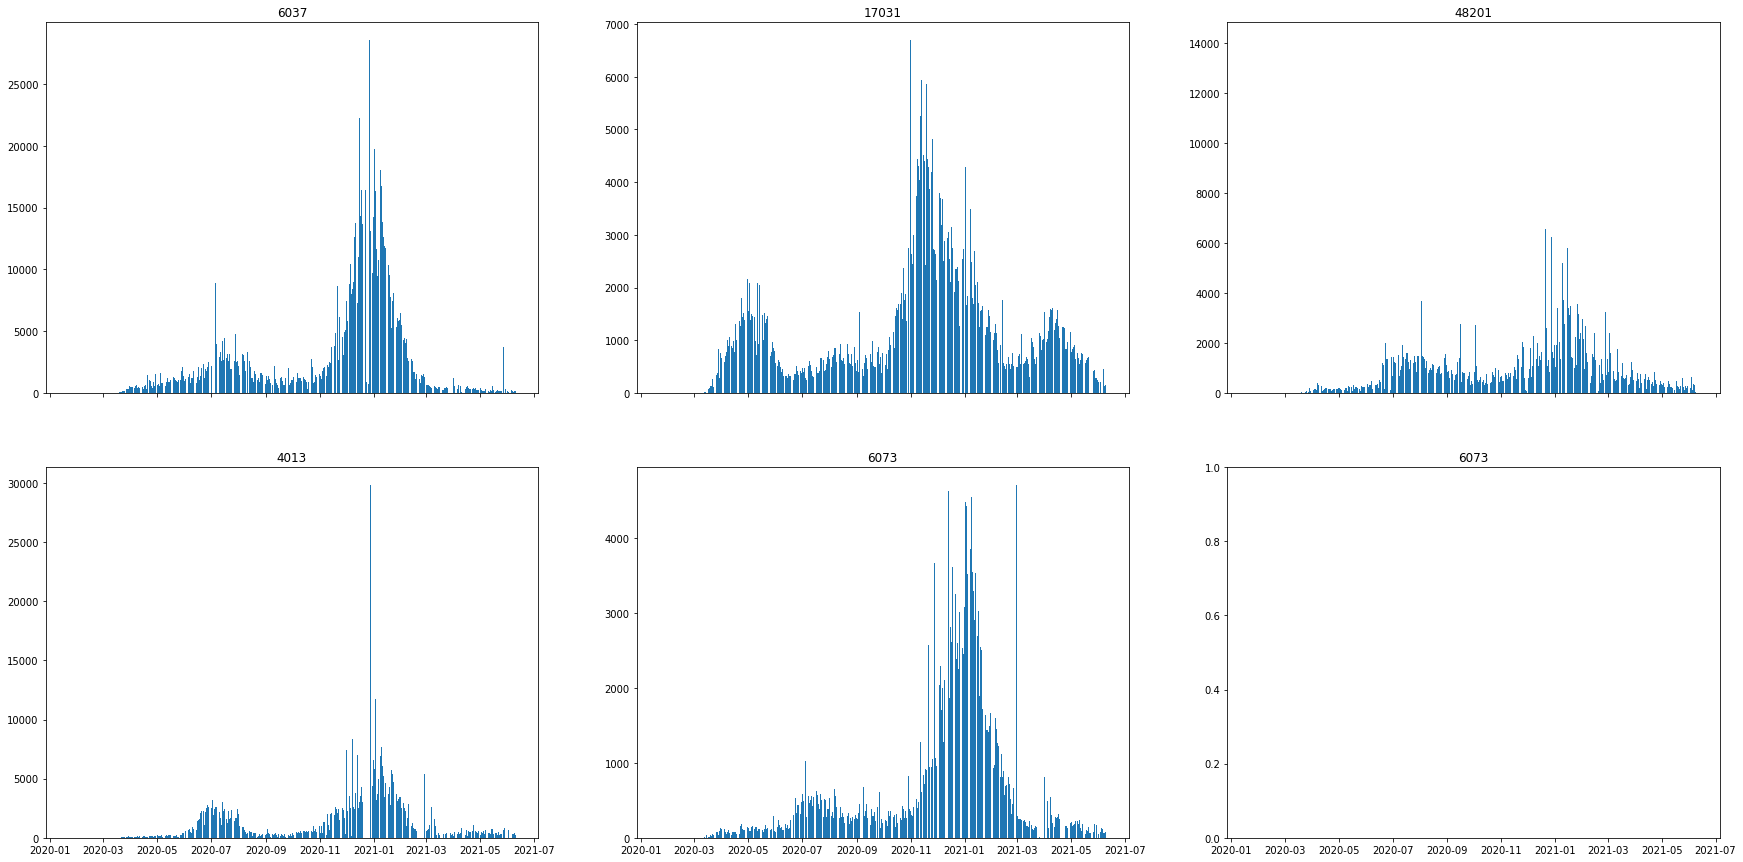

In [27]:
# top counts with covid_19_confirmed_cases
plt.figure(figsize = (20,20))
fig,axes = plt.subplots(2,3,sharex = True,figsize = (30,15))

for i,ax in zip(top_pop, axes.flat):    
    ax.bar(covid_grp.loc[np.where(covid_grp["county_fips"] == i)[0],'date'],covid_grp.loc[
        np.where(covid_grp["county_fips"] == i)[0],'covid_19_confirmed_cases'])
    ax.set_title(i)
    plt.title(str(i))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 864x432 with 0 Axes>

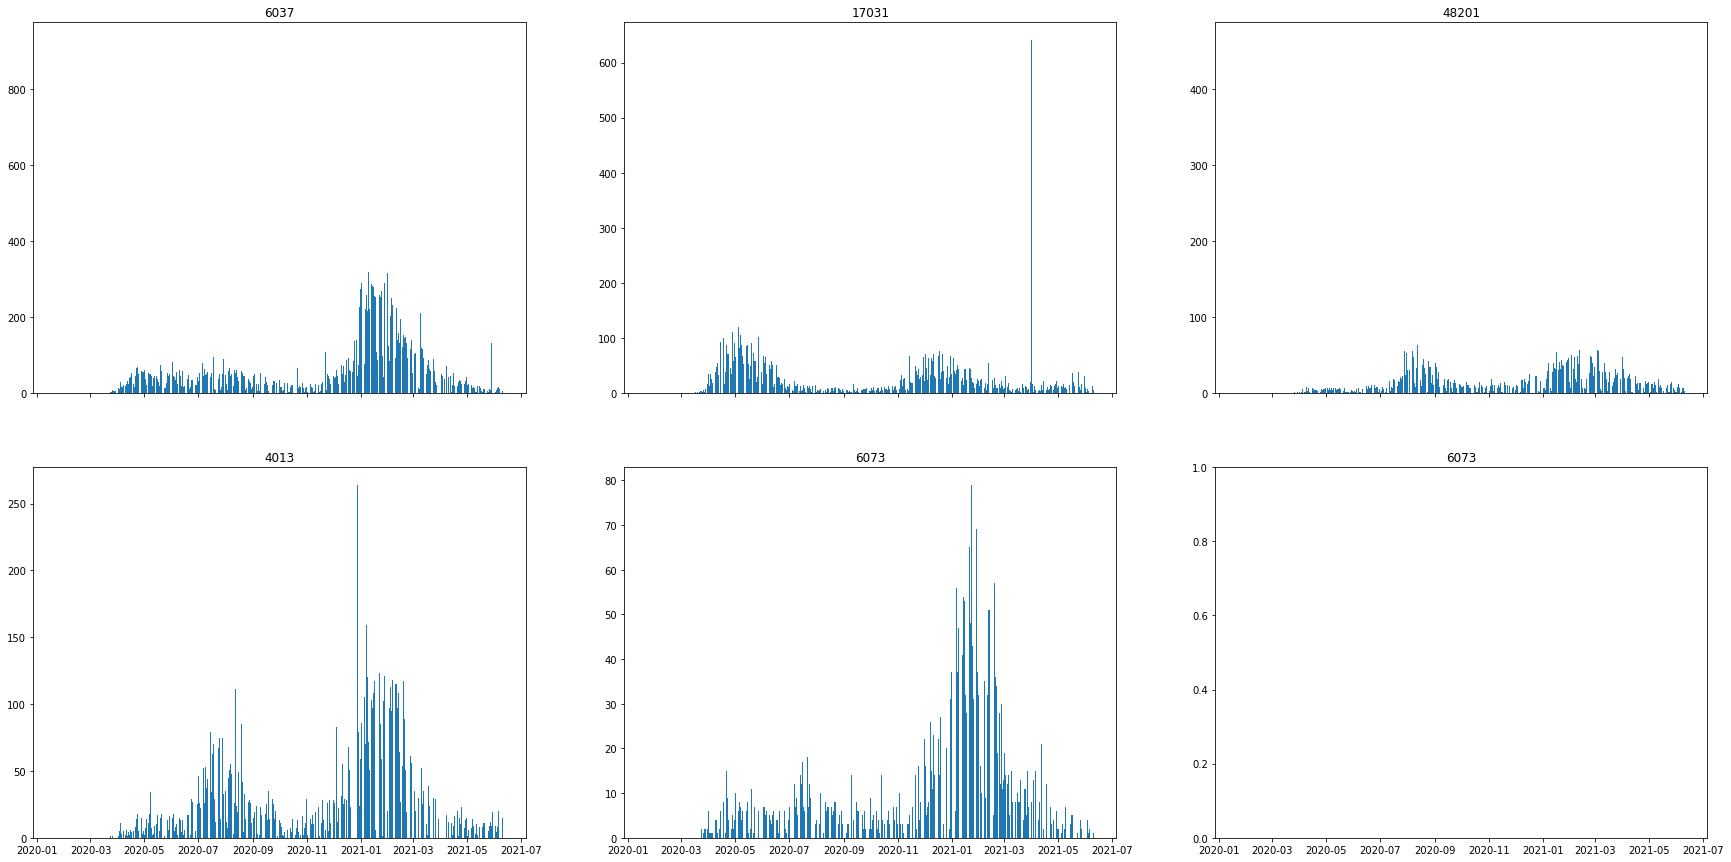

In [28]:
# top counts with covid_19_confirmed_cases
plt.figure(figsize = (12,6))
fig,axes = plt.subplots(2,3,sharex = True,figsize = (30,15))

for i,ax in zip(top_pop, axes.flat):    
    ax.bar(covid_grp.loc[np.where(covid_grp["county_fips"] == i)[0],'date'],covid_grp.loc[
        np.where(covid_grp["county_fips"] == i)[0],'covid_19_deaths'])
    ax.set_title(i)
    plt.title(str(i))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

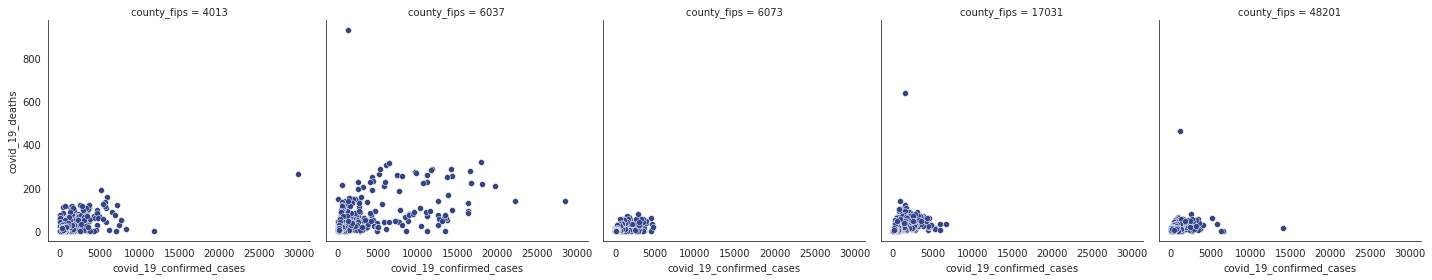

In [29]:
# confirmed case vs death
with sns.axes_style("white"):
    g = sns.FacetGrid(covid_grp, col="county_fips",  margin_titles=True, height=4)
g.map(sns.scatterplot, "covid_19_confirmed_cases", "covid_19_deaths", color="#334488")
g.set_axis_labels("covid_19_confirmed_cases", "covid_19_deaths")

In [30]:
for i in top_pop:
    print(i)
    print(covid_grp[covid_grp['county_fips'] == i][['covid_19_confirmed_cases','covid_19_deaths']].corr())
    print('\n')

6037
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.486054
covid_19_deaths                           0.486054         1.000000


17031
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.284569
covid_19_deaths                           0.284569         1.000000


48201
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.229909
covid_19_deaths                           0.229909         1.000000


4013
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.613991
covid_19_deaths                           0.613991         1.000000


6073
                          covid_19_confirmed_cases  covid_19_deaths
covid_19_confirmed_cases                  1.000000         0.573169
covid_19_deat

In [31]:
# confirmed case vs daily test
for i in top_pop:
    print(i)
    print(covid_grp[covid_grp['county_fips'] == i][['covid_19_confirmed_cases','daily_state_test']].corr())
    print('\n')

6037
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.588192
daily_state_test                          0.588192          1.000000


17031
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.619972
daily_state_test                          0.619972          1.000000


48201
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.436167
daily_state_test                          0.436167          1.000000


4013
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.513548
daily_state_test                          0.513548          1.000000


6073
                          covid_19_confirmed_cases  daily_state_test
covid_19_confirmed_cases                  1.000000          0.636425

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='covid_19_deaths'>

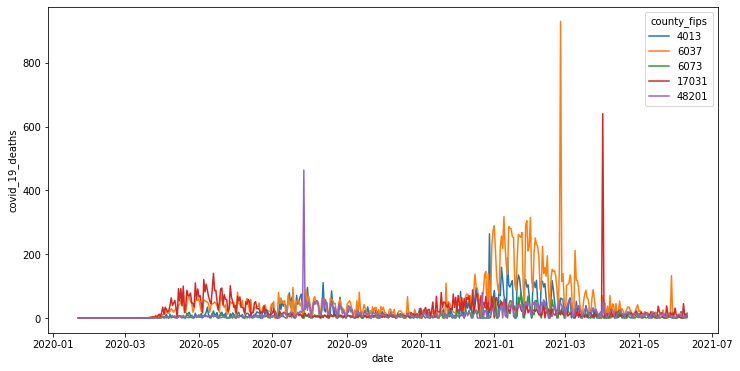

In [32]:
# top death in this five county
plt.figure(figsize = (12,6))
palette = sns.color_palette("tab10")
sns.lineplot(x = 'date', y = 'covid_19_deaths', hue = 'county_fips',data = covid_grp,palette = palette[:5])

In [33]:
# population_density vs total_population
# per county population density and total population stay same

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

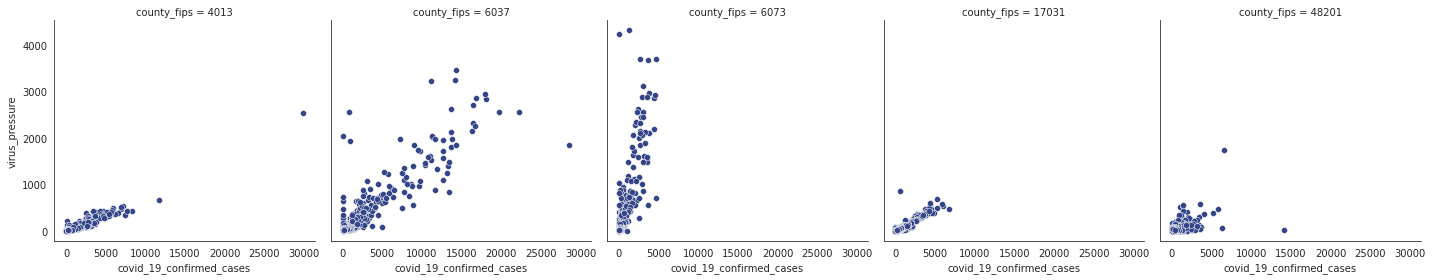

In [34]:
# virus_pressure vs covid_19_confirmed_cases
with sns.axes_style("white"):
    g = sns.FacetGrid(covid_grp, col="county_fips",  margin_titles=True, height=4)
g.map(sns.scatterplot, "covid_19_confirmed_cases", "virus_pressure", color="#334488")
g.set_axis_labels("covid_19_confirmed_cases", "virus_pressure")

In [35]:
for i in top_pop:
    print(i)
    print(covid_grp[covid_grp['county_fips'] == i][['covid_19_confirmed_cases','virus_pressure']].corr())
    print('\n')

6037
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.882294
virus_pressure                            0.882294        1.000000


17031
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.914125
virus_pressure                            0.914125        1.000000


48201
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.479233
virus_pressure                            0.479233        1.000000


4013
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.959981
virus_pressure                            0.959981        1.000000


6073
                          covid_19_confirmed_cases  virus_pressure
covid_19_confirmed_cases                  1.000000        0.805061
virus_pressure             

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

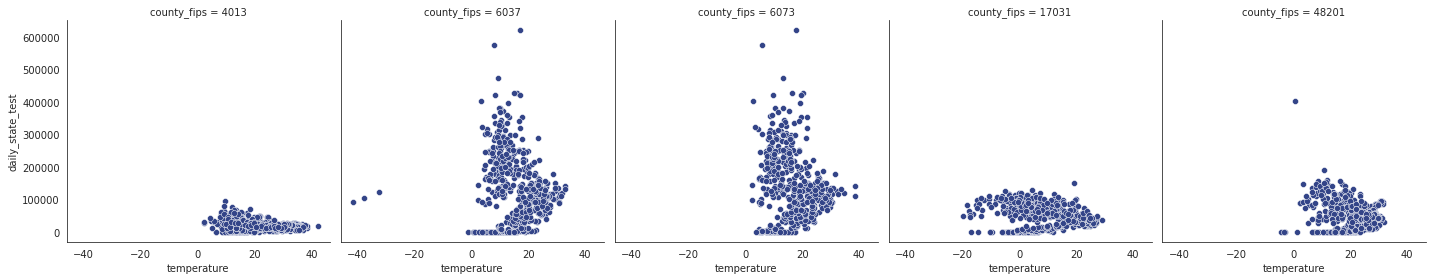

In [36]:
# daily_state_test vs temperature
with sns.axes_style("white"):
    g = sns.FacetGrid(covid_grp, col="county_fips",  margin_titles=True, height=4)
g.map(sns.scatterplot, "temperature", "daily_state_test", color="#334488")
g.set_axis_labels("temperature", "daily_state_test")

In [37]:
for i in top_pop:
    print(i)
    print(covid_grp[covid_grp['county_fips'] == i][['temperature','daily_state_test']].corr())
    print('\n')

6037
                  temperature  daily_state_test
temperature           1.00000          -0.11494
daily_state_test     -0.11494           1.00000


17031
                  temperature  daily_state_test
temperature          1.000000         -0.176414
daily_state_test    -0.176414          1.000000


48201
                  temperature  daily_state_test
temperature          1.000000         -0.252313
daily_state_test    -0.252313          1.000000


4013
                  temperature  daily_state_test
temperature          1.000000         -0.277925
daily_state_test    -0.277925          1.000000


6073
                  temperature  daily_state_test
temperature          1.000000         -0.083208
daily_state_test    -0.083208          1.000000




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

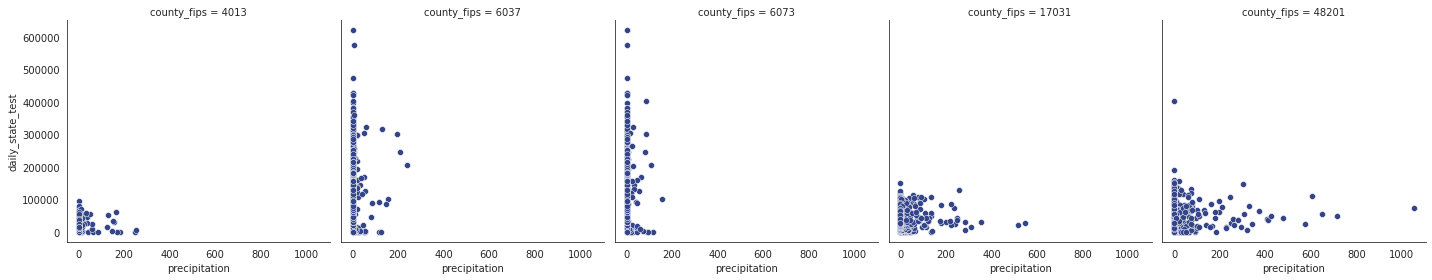

In [38]:
# daily_state_test vs precipitation
with sns.axes_style("white"):
    g = sns.FacetGrid(covid_grp, col="county_fips",  margin_titles=True, height=4)
g.map(sns.scatterplot, "precipitation", "daily_state_test", color="#334488")
g.set_axis_labels("precipitation", "daily_state_test")

In [49]:
for i in top_pop:
    print(i)
    print(covid_grp[covid_grp['county_fips'] == i][['precipitation','daily_state_test']].corr())
    print('\n')

6037
                  precipitation  daily_state_test
precipitation          1.000000         -0.004487
daily_state_test      -0.004487          1.000000


17031
                  precipitation  daily_state_test
precipitation          1.000000         -0.079435
daily_state_test      -0.079435          1.000000


48201
                  precipitation  daily_state_test
precipitation          1.000000         -0.000965
daily_state_test      -0.000965          1.000000


4013
                  precipitation  daily_state_test
precipitation          1.000000         -0.014835
daily_state_test      -0.014835          1.000000


6073
                  precipitation  daily_state_test
precipitation          1.000000         -0.057848
daily_state_test      -0.057848          1.000000




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

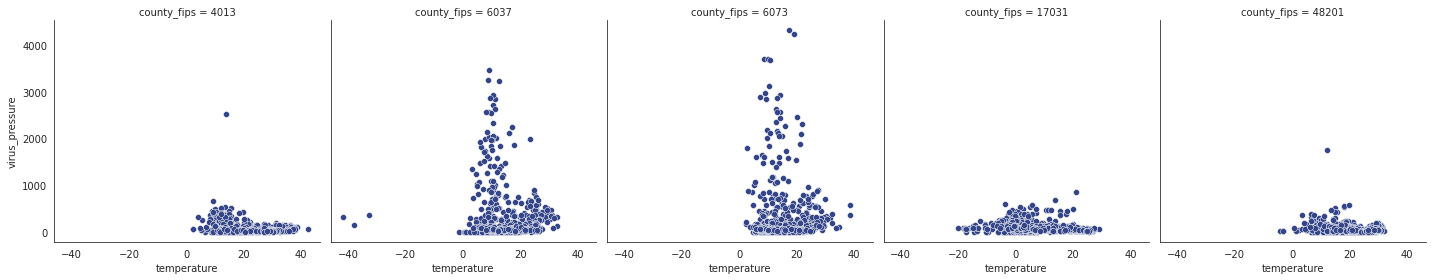

In [39]:
# virus_pressure vs temperature  
with sns.axes_style("white"):
    g = sns.FacetGrid(covid_grp, col="county_fips",  margin_titles=True, height=4)
g.map(sns.scatterplot, "temperature", "virus_pressure", color="#334488")
g.set_axis_labels("temperature", "virus_pressure")

In [50]:
for i in top_pop:
    print(i)
    print(covid_grp[covid_grp['county_fips'] == i][['precipitation','virus_pressure']].corr())
    print('\n')

6037
                precipitation  virus_pressure
precipitation        1.000000        0.031097
virus_pressure       0.031097        1.000000


17031
                precipitation  virus_pressure
precipitation        1.000000       -0.034953
virus_pressure      -0.034953        1.000000


48201
                precipitation  virus_pressure
precipitation        1.000000       -0.053034
virus_pressure      -0.053034        1.000000


4013
                precipitation  virus_pressure
precipitation        1.000000        0.004909
virus_pressure       0.004909        1.000000


6073
                precipitation  virus_pressure
precipitation        1.000000       -0.001036
virus_pressure      -0.001036        1.000000




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

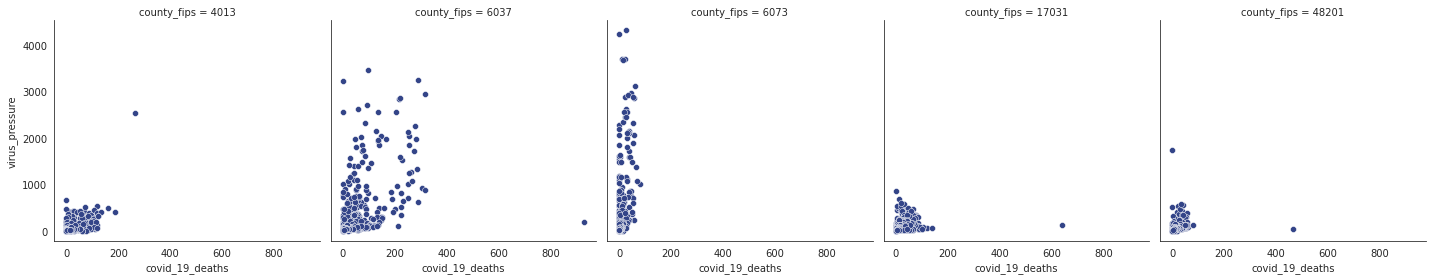

In [40]:
# virus_pressure vs covid_19_deaths
with sns.axes_style("white"):
    g = sns.FacetGrid(covid_grp, col="county_fips",  margin_titles=True, height=4)
g.map(sns.scatterplot, "covid_19_deaths", "virus_pressure", color="#334488")
g.set_axis_labels("covid_19_deaths", "virus_pressure")

In [51]:
# percent smoker and covid 19 death
for i in top_pop:
    print(i)
    print(covid_grp[covid_grp['county_fips'] == i]['percent_of_smokers'].mean())
    print(covid_grp[covid_grp['county_fips'] == i]['death_ratio'].mean())
    print('\n')

6037
10.847678109000004
0.006359999999999899


17031
13.776183161999999
0.007940000000000001


48201
13.852121657999996
0.005782


4013
13.686398250999995
0.007313999999999999


6073
10.753175291
0.006514999999999998




In [53]:
# percent diabetes and covid 19 death
for i in top_pop:
    print(i)
    print(covid_grp[covid_grp['county_fips'] == i]['percent_of_diabetes'].mean())
    print(covid_grp[covid_grp['county_fips'] == i]['death_ratio'].mean())
    print('\n')

6037
8.400000000000002
0.006359999999999899


17031
9.5
0.007940000000000001


48201
10.0
0.005782


4013
8.900000000000002
0.007313999999999999


6073
7.099999999999999
0.006514999999999998




In [45]:
# immigrant_student_ratio and covid_19_confirmed_cases
for i in top_pop:
    print(i)
    print(covid_grp[covid_grp['county_fips'] == i]['immigrant_student_ratio'].mean())
    print(covid_grp[covid_grp['county_fips'] == i]['population_density'].mean())
    print(covid_grp[covid_grp['county_fips'] == i]['covid_19_confirmed_cases'].sum())
    print('\n')

6037
0.022477521686666602
2490.3442191489153
1203649.0


17031
0.016351918630138
5480.089492558154
555488.0


48201
0.012861225819756796
2758.2472350717358
402818.0


4013
0.019738262057157504
479.4300956289798
553711.0


6073
0.0247574000318242
794.7844236360222
280941.0




In [48]:
for i in top_pop:
    print(i)
    print(covid_grp[covid_grp['county_fips'] == i]['death_ratio'].mean())
    print(covid_grp[covid_grp['county_fips'] == i]['covid_19_deaths'].sum())
    print('\n')

6037
0.006359999999999899
24431.0


17031
0.007940000000000001
11102.0


48201
0.005782
6497.0


4013
0.007313999999999999
10137.0


6073
0.006514999999999998
3765.0


